### Dilution Problem in Python

A tank initially holds 100 gal of a brine solution containing 1 Ib of salt. At t = 0 another brine solution
containing 1 Ib of salt per gallon is poured into the tank at the rate of 3 gal/min, while the well-stirred
mixture leaves the tank at the same rate. Find (a) the amount of salt in the tank at any time t and (b) the
time at which the mixture in the tank contains 2 Ib of salt.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
q0 = 100 # initial brine solution containing 1 lb of salt in the tank
qin = 1 # amount of salt that brine solution contains initially at time = 0
qout = 1 # amount of salt that another brine solution contains
e = 3 # rate at which another brine solution is poured into the tank
f = 3 # rate at which well-stirred mixture leaves the tank

In [3]:
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# integrate the equations
t = np.linspace(0,10) # times to report solution
y = odeint(model,q0,t) # integrate

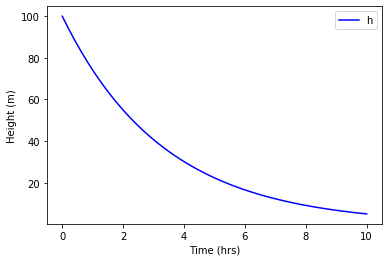

In [5]:
# plot results
plt.figure(1)
plt.plot(t,y[:,0],'b-')
#plt.plot(t,y[:,1],'r--')
plt.xlabel('Time (hrs)')
plt.ylabel('Height (m)')
plt.legend('h1')
plt.show()